![alt text](http://www.cs.nott.ac.uk/~pszgss/teaching/nlab.png)
# ExC Panel Survey

Trying to use ChatGPT as an experimental subject

In [1]:
import pandas as pd
# load data
data_gpt = pd.read_csv('data_gpt.csv')
data_panel = pd.read_csv('data_panel.csv')

Want to create the map and put both values on it, but need to bring data_panel to look like data_gpt first.

In [2]:
data_gpt.describe()
# trashy gpt data, only one 5 and a 2 put by me...

,Unnamed: 0,subjid,quest,rating,age
count,640.000000,640.000000,640.000000,640.000000,640.000000
mean,319.500000,8.500000,1.500000,3.660938,42.500000
std,184.896367,4.613378,0.500391,0.480322,5.594542
min,0.000000,1.000000,1.000000,2.000000,35.000000
25%,159.750000,4.750000,1.000000,3.000000,38.750000
50%,319.500000,8.500000,1.500000,4.000000,42.500000
75%,479.250000,12.250000,2.000000,4.000000,46.250000
max,639.000000,16.000000,2.000000,5.000000,50.000000


In [3]:
data_gpt.rating = data_gpt.rating-3

In [4]:
data_gpt.tail()

,Unnamed: 0,subjid,quest,product,rating,gender,age,role
635,635,15,2,coffee machine,1,male,50,Chief Data Officer
636,636,15,2,jewellery,1,male,50,Chief Data Officer
637,637,16,2,running shoes,0,male,50,Professor
638,638,16,2,coffee machine,1,male,50,Professor
639,639,16,2,jewellery,1,male,50,Professor


In [5]:
data_panel.head()

,Timestamp,Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a holiday/vacation],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a car to buy],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a savings account],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a present for a close relative],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing an energy supplier],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing what to buy for a takeout lunch in a location you are unfamiliar with],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing bedroom furniture],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a new smart phone],Q1: In your opinion how do you think the typical UK consumer would feel about using/consuming a product or a service for each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing clothes for everyday wear],...,Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing wine/beer],Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing music concert or movie to go to],Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a home security system],Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a toothpaste],"Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a self-care package (e.g., spa, skin, nails)]",Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of the following purchase scenarios. Please assume the consumer can afford each of the following. [Choosing a video game console],Q2: In your opinion how do you think the typical UK consumer would feel about searching for information regarding each of th

In [6]:
subjects = list(map(lambda x:x+501, list(range(data_panel.shape[0]))))
#subjects
data_panel['subjid'] = subjects

In [7]:
# rename columns
product_panel = ["holiday", "car", "savings account", "present for a close relative", "energy supplier", "takeout lunch in a location you are unfamiliar with", "bedroom furniture", "new smartphone", "clothes for everyday wear", "food and drink items for the main grocery shop", "wine", "music concert", "home security system", "toothpaste", "spa", "video game console", "clothes for a friend's wedding", "running shoes", "coffee machine", "jewellery"]
new_columns = data_panel.columns.values
for i in range(len(product_panel)):
  new_columns[i+1] = "q1_"+product_panel[i]
  new_columns[i+21] = "q2_"+product_panel[i]
new_columns

array(['Timestamp', 'q1_holiday', 'q1_car', 'q1_savings account',
       'q1_present for a close relative', 'q1_energy supplier',
       'q1_takeout lunch in a location you are unfamiliar with',
       'q1_bedroom furniture', 'q1_new smartphone',
       'q1_clothes for everyday wear',
       'q1_food and drink items for the main grocery shop', 'q1_wine',
       'q1_music concert', 'q1_home security system', 'q1_toothpaste',
       'q1_spa', 'q1_video game console',
       "q1_clothes for a friend's wedding", 'q1_running shoes',
       'q1_coffee machine', 'q1_jewellery', 'q2_holiday', 'q2_car',
       'q2_savings account', 'q2_present for a close relative',
       'q2_energy supplier',
       'q2_takeout lunch in a location you are unfamiliar with',
       'q2_bedroom furniture', 'q2_new smartphone',
       'q2_clothes for everyday wear',
       'q2_food and drink items for the main grocery shop', 'q2_wine',
       'q2_music concert', 'q2_home security system', 'q2_toothpaste',
       

In [8]:
data_panel.columns = new_columns
data_panel.head()

,Timestamp,q1_holiday,q1_car,q1_savings account,q1_present for a close relative,q1_energy supplier,q1_takeout lunch in a location you are unfamiliar with,q1_bedroom furniture,q1_new smartphone,q1_clothes for everyday wear,...,q2_music concert,q2_home security system,q2_toothpaste,q2_spa,q2_video game console,q2_clothes for a friend's wedding,q2_running shoes,q2_coffee machine,q2_jewellery,subjid
0,21/03/2023 13:55:26,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,...,Enjoy,Enjoy,Neither enjoy or don't enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,501
1,22/03/2023 10:03:25,Enjoy very much,Neither enjoy or don't enjoy,Neither enjoy or don't enjoy,Enjoy,"Neither enjoy or don't enjoy, Don't enjoy",Don't enjoy,Enjoy,Enjoy,Enjoy,...,Neither enjoy or don't enjoy,Neither enjoy or don't enjoy,Neither enjoy or don't enjoy,Enjoy,Enjoy,Enjoy,Don't enjoy,Enjoy,Enjoy,502
2,22/03/2023 17:38:15,Enjoy,Enjoy,Don't enjoy,Enjoy,Don't enjoy at all,Don't enjoy,Enjoy,Enjoy,Enjoy,...,Enjoy very much,Don't enjoy,Don't enjoy at all,Enjoy,Enjoy,Enjoy,Enjoy,Don't enjoy,Enjoy very much,503
3,29/03/2023 12:00:50,Enjoy very much,Enjoy,Neither enjoy or don't enjoy,Enjoy,Neither enjoy or don't enjoy,Enjoy,Enjoy,Enjoy,Enjoy,...,Enjoy,Neither enjoy or don't enjoy,Neither enjoy or don't enjoy,Enjoy very much,Enjoy,Enjoy,Enjoy,Enjoy,Enjoy,504


In [9]:
data_panel_long = pd.wide_to_long(data_panel, ["q1","q2"], i="subjid", j = "product", sep = "_", suffix = "\D+")

In [10]:
data_panel_long.head()

,,Timestamp,q1,q2
subjid,product,,,
501,holiday,21/03/2023 13:55:26,Enjoy,Enjoy
502,holiday,22/03/2023 10:03:25,Enjoy very much,Enjoy
503,holiday,22/03/2023 17:38:15,Enjoy,Enjoy very much
504,holiday,29/03/2023 12:00:50,Enjoy very much,Enjoy very much
501,car,21/03/2023 13:55:26,Enjoy,Enjoy


In [ ]:
enjoy_map = {'Enjoy very much': 2, 'Enjoy': 1, 'Neither enjoy or don\'t enjoy	': 0, 
               'Don\'t enjoy': -1, 'Don\'t enjoy at all': -2}
data_panel_long['q1'] = data_panel_long['q1'].map(enjoy_map)
data_panel_long['q2'] = data_panel_long['q2'].map(enjoy_map)
data_panel_long.head()

In [12]:
data_panel_longm = data_panel_long.reset_index()
data_panel_longm.head()

,subjid,product,Timestamp,q1,q2
0,501,holiday,21/03/2023 13:55:26,1.0,1.0
1,502,holiday,22/03/2023 10:03:25,2.0,1.0
2,503,holiday,22/03/2023 17:38:15,1.0,2.0
3,504,holiday,29/03/2023 12:00:50,2.0,2.0
4,501,car,21/03/2023 13:55:26,1.0,1.0


/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


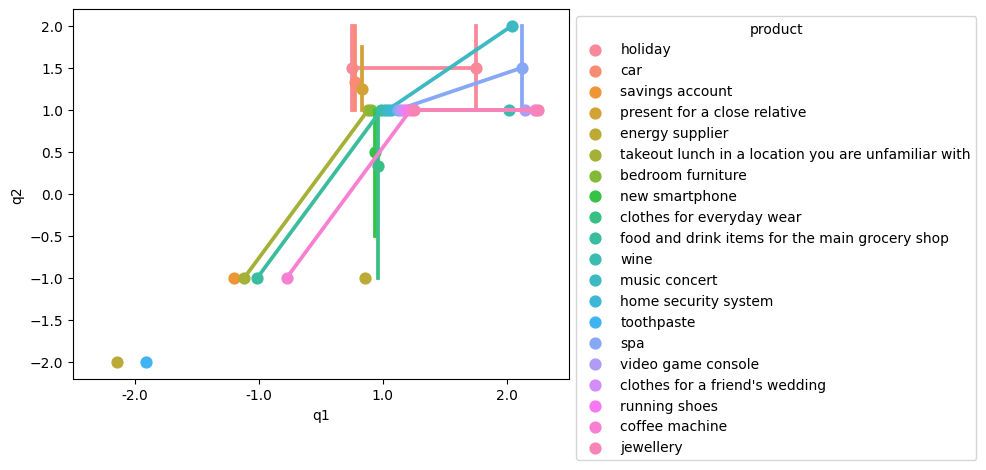

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.pointplot(data_panel_longm, x = 'q1', y = 'q2', hue = 'product', dodge=True, estimator='mean', join='False')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# weird...

In [14]:
data_panel_sum = data_panel_longm.groupby(['product'])['q1','q2'].agg(['mean','std']).reset_index()
data_panel_sum

<ipython-input-14-0a574b144f7b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_panel_sum = data_panel_longm.groupby(['product'])['q1','q2'].agg(['mean','std']).reset_index()


product        q1            \
                                                           mean       std   
0                                   bedroom furniture  1.000000  0.000000   
1                                                 car  1.000000  0.000000   
2                      clothes for a friend's wedding  1.000000  0.000000   
3                           clothes for everyday wear  1.000000  0.000000   
4                                      coffee machine  0.750000  1.258306   
5                                     energy supplier -0.500000  2.121320   
6      food and drink items for the main grocery shop  0.000000  1.414214   
7                                             holiday  1.500000  0.577350   
8                                home security system  1.000000       NaN   
9                                           jewellery  1.666667  0.577350   
10                                      music concert  1.250000  0.500000   
11                                     new smartphone  1.000000  0.000000   
12                       present for a close relative  1.000000  0.000000   
13                                      running shoes  1.000000  0.000000   
14                                    savings account  0.000000  1.414214   
15                                                spa  1.500000  0.577350   
16  takeout lunch in a location you are unfamiliar...  0.000000  1.154701   
17                                         toothpaste -0.500000  2.121320   
18                                 video game console  1.250000  0.500000   
19                                               wine  1.500000  0.577350   

          q2            
        mean       std  
0   1.000000  0.000000  
1   1.333333  0.577350  
2   1.000000  0.000000  
3   0.333333  1.154701  
4   0.500000  1.000000  
5  -1.333333  0.577350  
6   0.000000  1.414214  
7   1.500000  0.577350  
8   0.000000  1.414214  
9   1.250000  0.500000  
10  1.333333  0.577350  
11  0.500000  1.000000  
12  1.250000  0.500000  
13  0.500000  1.000000  
14 -1.000000       NaN  
15  1.250000  0.500000  
16  0.000000  1.154701  
17 -2.000000       NaN  
18  1.000000  0.000000  
19  1.000000  0.000000

In [15]:
data_panel_sum["product"][0]

'bedroom furniture'

In [16]:
data_gpt_sum = data_gpt.groupby(['product','quest'])['rating'].agg(['mean','std']).reset_index()
data_gpt_sum

,product,quest,mean,std
0,bedroom furniture,1,0.6875,0.478714
1,bedroom furniture,2,0.3125,0.478714
2,car,1,0.4375,0.512348
3,car,2,0.6875,0.478714
4,clothes for a friend's wedding,1,0.3125,0.478714
5,clothes for a friend's wedding,2,0.7500,0.447214
6,clothes for everyday wear,1,0.6875,0.478714
7,clothes for everyday wear,2,0.8750,0.341565
8,coffee machine,1,1.0000,0.000000
9,coffee machine,2,0.9375,0.250000


In [17]:
data_gpt_sumq1 = data_gpt_sum[data_gpt_sum["quest"].values == 1]
data_gpt_sumq2 = data_gpt_sum[data_gpt_sum["quest"].values == 2]
data_gpt_sumq1

,product,quest,mean,std
0,bedroom furniture,1,0.6875,0.478714
2,car,1,0.4375,0.512348
4,clothes for a friend's wedding,1,0.3125,0.478714
6,clothes for everyday wear,1,0.6875,0.478714
8,coffee machine,1,1.0000,0.000000
10,energy supplier,1,0.0000,0.000000
12,food and drink items for the main grocery shop,1,0.0000,0.000000
14,holiday,1,1.0000,0.000000
16,home security system,1,0.0000,0.000000
18,jewellery,1,0.5000,0.516398


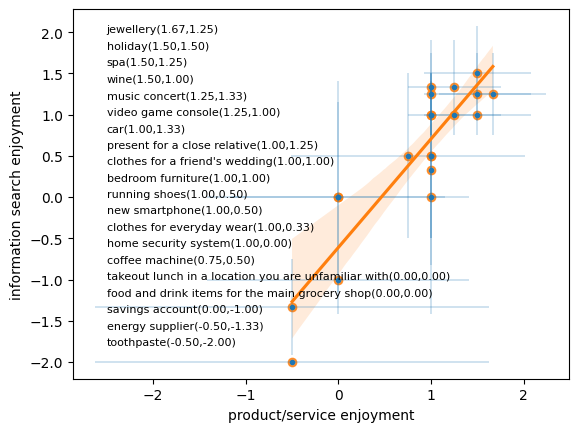

In [39]:
import random
#data_panel_sum.q1['mean']
plt.errorbar(data_panel_sum.q1['mean'], data_panel_sum.q2['mean'], xerr=data_panel_sum.q1['std'], yerr=data_panel_sum.q2['std'], fmt="o", ms = 3, elinewidth = 0.3)
sns.regplot(x = data_panel_sum.q1['mean'], y = data_panel_sum.q2['mean'])
plt.xlabel('product/service enjoyment')
plt.ylabel('information search enjoyment')

#import matplotlib.transforms as mtransforms
#ax = plt.axes()
#trans_offset = mtransforms.offset_copy(ax.transData, x=0.05, y=0.10, units='inches')
n = -1
dy = -1.8
clst = list(zip(data_panel_sum.q1['mean'],data_panel_sum.q2['mean']))
sclst = sorted(list(zip(data_panel_sum.q1['mean'],data_panel_sum.q2['mean'])), key=lambda x: (x[0], x[1]))
clst.index((-0.5, -2.0)) 
for x, y in sclst:
  if clst.index((x, y)) == n:
    n = [i for i, m in enumerate(clst) if m == (x, y)][1]
    plt.text(-2.5, dy, data_panel_sum["product"][n] + "(" + "%.2f" % x + "," + "%.2f" % y + ")", fontsize=8)
    dy+=0.2
  else:
    n = clst.index((x, y)) 
    plt.text(-2.5, dy, data_panel_sum["product"][n] + "(" + "%.2f" % x + "," + "%.2f" % y + ")", fontsize=8)
    dy+=0.2
plt.show()

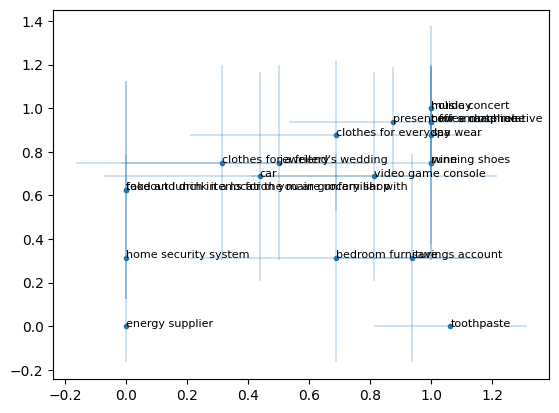

In [ ]:
plt.errorbar(data_gpt_sumq1['mean'], data_gpt_sumq2['mean'], xerr=data_gpt_sumq1['std'], yerr=data_gpt_sumq2['std'], fmt="o", ms = 3, elinewidth = 0.3)
n=0
for x, y in zip(data_gpt_sumq1['mean'],data_gpt_sumq2['mean']):
  plt.text(x, y, data_panel_sum["product"][n], fontsize=8)
  n+=1
plt.show()

<ErrorbarContainer object of 3 artists>

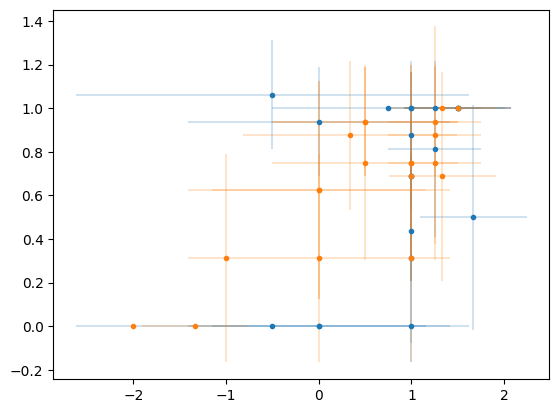

In [ ]:
# panel vs gpt Q1 & Q2
plt.errorbar(data_panel_sum.q1['mean'], data_gpt_sumq1['mean'], xerr=data_panel_sum.q1['std'], yerr=data_gpt_sumq1['std'], fmt="o", ms = 3, elinewidth = 0.3)
plt.errorbar(data_panel_sum.q2['mean'], data_gpt_sumq2['mean'], xerr=data_panel_sum.q2['std'], yerr=data_gpt_sumq2['std'], fmt="o", ms = 3, elinewidth = 0.3)

